# Análisis de los 25 retailers más grandes de Estados Unidos

In [ ]:
# Importar librerías aquí
import pandas  as pd
import numpy   as np
import seaborn as sn
import matplotlib.pyplot as plt

In [ ]:
# Importar datos aquí
df = pd.read_csv('/work/largest_us_retailers_9b00dc73-a938-46cd-af17-fcb2bd67301f.csv')
df.sort_values('Sales',ascending=0);
# Existe dos datos en categorias que son los mismos Warehouse club y Warehouse clubs
df = df.replace(to_replace ="Warehouse Club",value ="Warehouse Clubs");
df




,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category
0,Walmart US,658119,4574.0,65.649725,0.012843,Supercenters
1,Kroger,115037,3931.0,30.031850,0.053887,Grocery
2,Costco,90048,495.0,187.795620,0.066810,Warehouse Clubs
3,Home Depot,83976,1965.0,42.735878,0.000000,Home Improvement
4,Walgreen Boots,78924,8002.0,9.810927,-0.010511,Drug Stores
5,CVS incl. Target,77792,9813.0,8.825959,0.255662,Drug Stores
6,Amazon,71687,NaN,NaN,NaN,Electronic/Mail Order
7,Target,71208,1772.0,39.982033,-0.010056,Supercenters
8,Lowe's,60311,1828.0,33.311792,0.019520,Home Improvement
9,Albertsons,56829,2326.0,23.877731,-0.044371,Grocery


## I. Preguntas del negocio

### 1. ¿Cuál es el promedio de ventas sin contar a la compañía dominante?

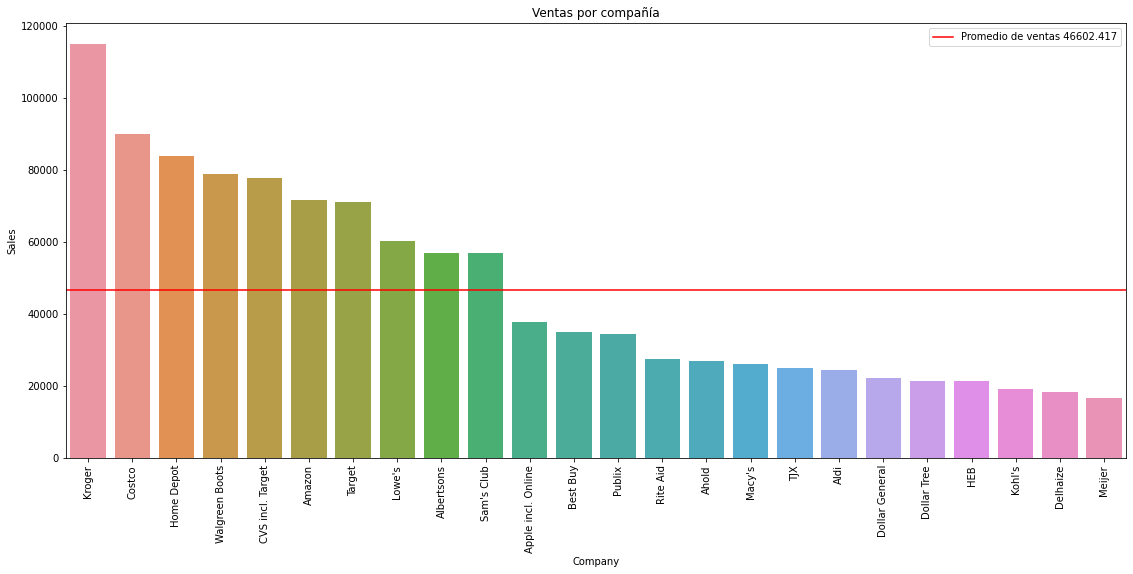

In [ ]:
   #Data Frame sin la compañía dominante Walmart
dfnw = df.drop(df.index[0])
   #Calculo del promedio
mean_sales = dfnw['Sales'].mean()
   #Figura 
plt.figure(figsize=(19,8));
plt.xticks(rotation=90);
plt.title('Ventas por compañía')
ax = plt.subplot()
   #diagrama de barras
sn.barplot(data=dfnw,y='Sales', x ='Company' )
ax.axhline(mean_sales,color='red',label='Promedio de ventas '+ str(round(mean_sales, 3)))
plt.legend();

#### Conclusiones 
El promedio de ventas sin contar la compañia dominante Walmart es de aproximadamente 46000 usd
el rango va desde Kroger con unas ventas de 115037 usd a Meijer con 16592 usd.

#### Aspectos a detacar
* 14 compañias estan por debajo del promedio.
* Kroger vende mas de 2.4 veces el promedio. 






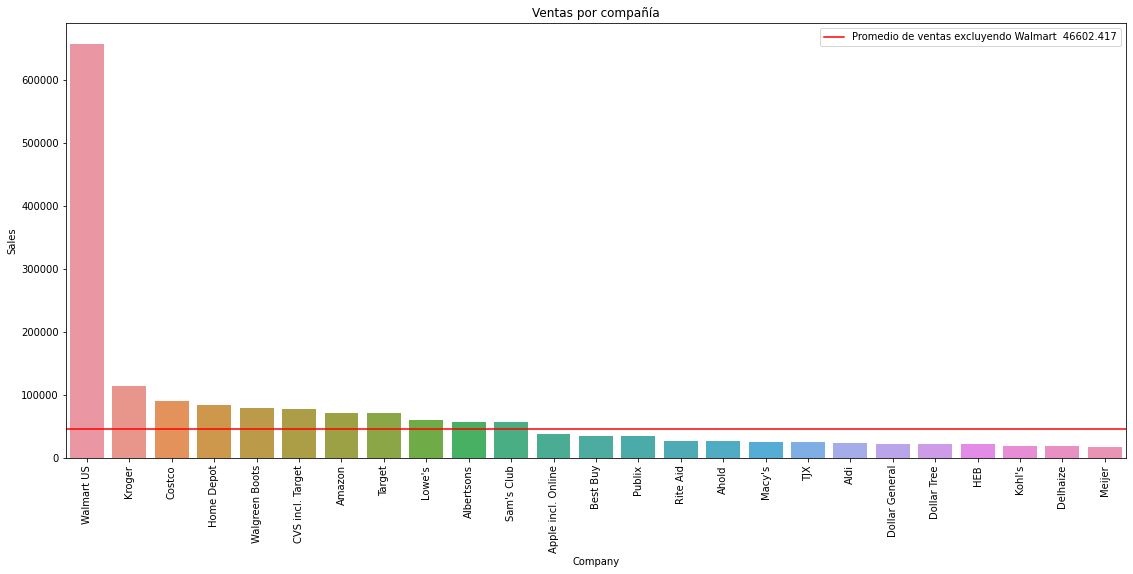

In [ ]:
   #Figura 
plt.figure(figsize=(19,8));
plt.xticks(rotation=90);
plt.title('Ventas por compañía')
ax = plt.subplot()
#diagrama de barras
sn.barplot(data=df,y='Sales', x ='Company' )
ax.axhline(mean_sales,color='red',label='Promedio de ventas excluyendo Walmart  '+ str(round(mean_sales, 3)))
plt.legend();

Podemos considerar los datos de ventas de Walmart como datos atipicos debido a que sus ventas son catorce veces mas grandes que el promedio de las restanntes.

Ventas de Walmart 659119 usd.\
Promedio excluyendo Walmart 46602 usd.

### 2. ¿Cuánto dinero en ventas generó la mayoría de las compañías?

Text(0, 0.5, 'frecuencia')

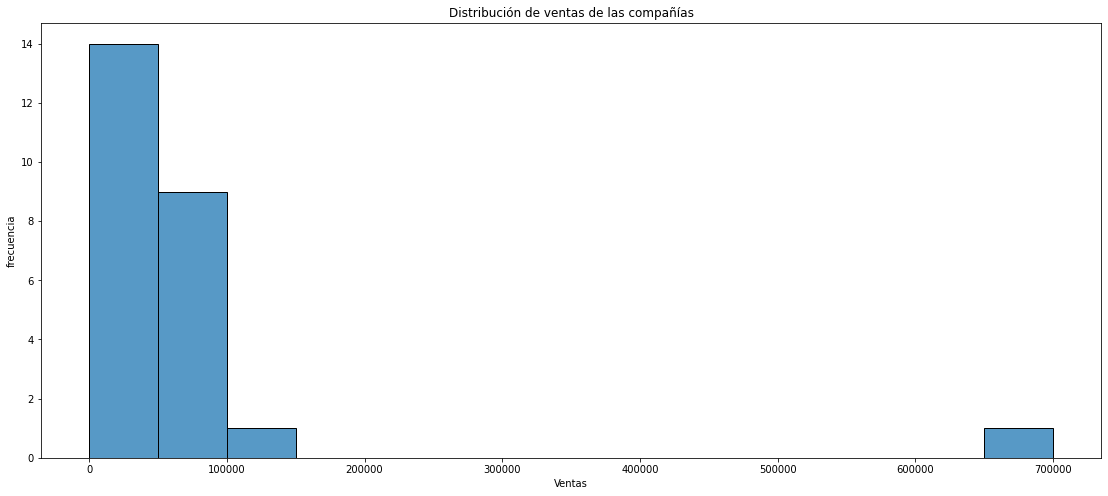

In [ ]:
plt.figure(figsize=(19,8)); 
sn.histplot(data=df,x='Sales' ,binrange = [0,700000],binwidth=50000)
plt.title("Distribución de ventas de las compañías")
plt.xlabel('Ventas')
plt.ylabel('frecuencia')

##### Conclusiones
El 56% de las compañias (14 de 25) generaron entre 16000 y 50000 usd.

##### Aspectos a detacar
* 9 compañias el 36% venden entre 50000 y 100000 usd.
* Una compañia tiene ingresos entre 100000 y 150000 usd.

### 3. ¿Cuántas tiendas tiene la mayoría de las compañías?

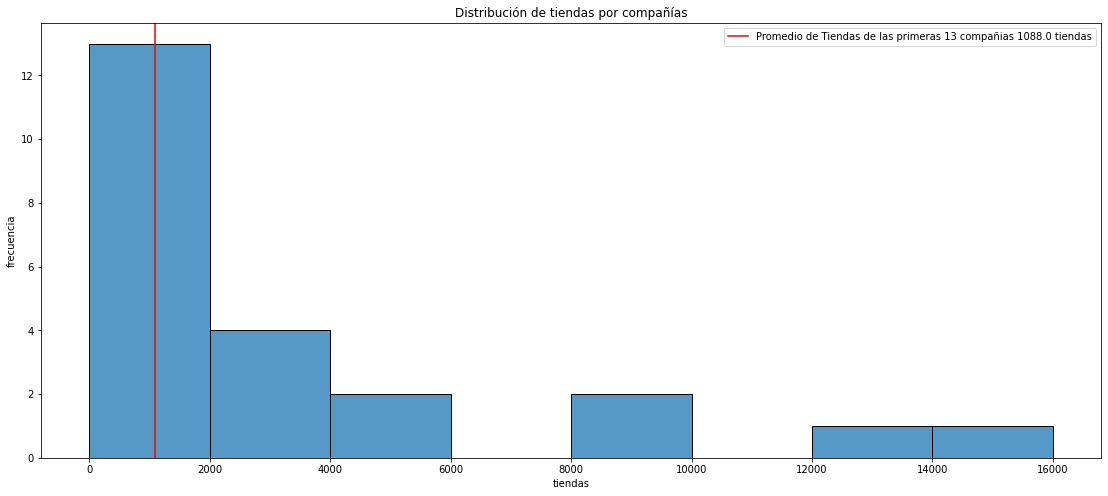

In [ ]:
plt.figure(figsize=(19,8)); 
sn.histplot(data=df,x='Stores' ,binrange = [0,15000],binwidth=2000)
plt.title("Distribución de tiendas por compañías")
plt.xlabel('tiendas')
plt.ylabel('frecuencia')
dfs = df[df.Stores < 2000]
mean = dfs['Stores'].mean()
ax = plt.subplot()
ax.axvline(mean,color='red',label='Promedio de Tiendas de las primeras 13 compañias '+ str(round(mean, 0)) + ' tiendas')
plt.legend();
  

##### Conclusion
23 compañias cuentan con tiendas fisicas 56% de ellas (13) cuentan con un rango de 231 a 2000 tiendas con un promedio aproximado de 1088 tiendas.

##### Aspectos a destacar
* 2 de 23 Compañias aproximadamente el 9% tienen de 800 a 10000 tiendas



### 4. ¿La cantidad de tiendas está relacionada con la cantidad de ventas? Es decir, ¿si una empresa tiene más tiendas tendrá más dinero de ventas?

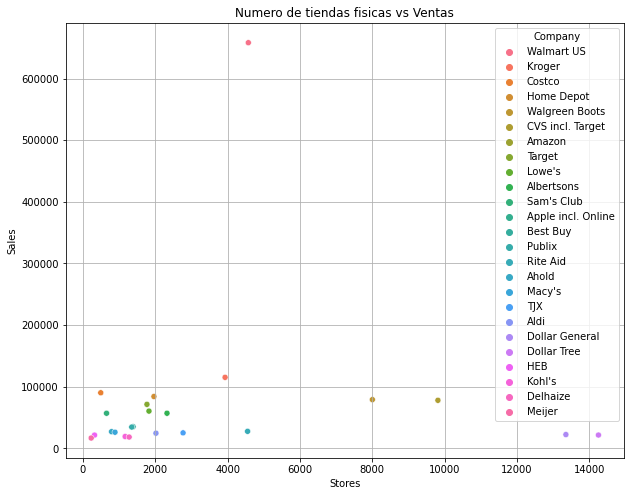

In [ ]:
plt.figure(figsize=(10,8)); 
sn.scatterplot(data=df,x='Stores',y='Sales',hue='Company')
plt.title('Numero de tiendas fisicas vs Ventas')
plt.grid()

##### Conclusiones
No existe una correlacion entre el numero de tiendas y las ventas lo que significa que mayor numero de tiendas no genera un mayor numero de ventas.

### 5. ¿Cuál es el rango que existe entre las ventas?

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
641527


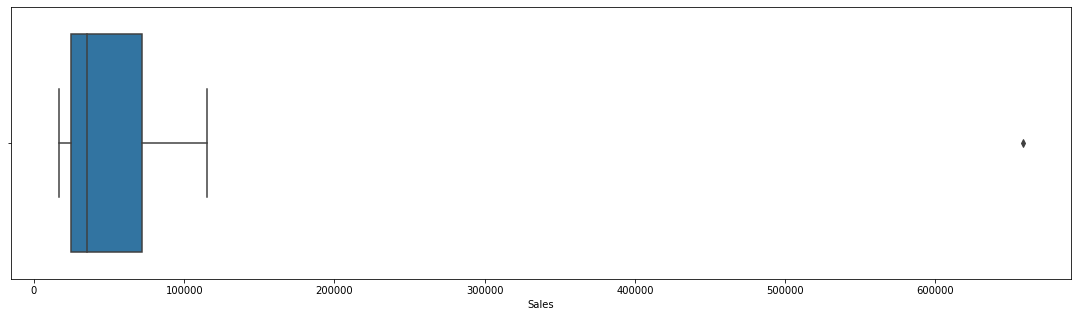

In [ ]:
plt.figure(figsize=(19,5)); 
sn.boxplot(df['Sales'])
sales_range = df['Sales'].max()-df['Sales'].min()
print(sales_range)

En el diagrama de bloque podemos observar un dato atipico que son las ventas de Walmart considerandolo podriamos \
decir que el rango es de 641,527 usd.

98445
/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


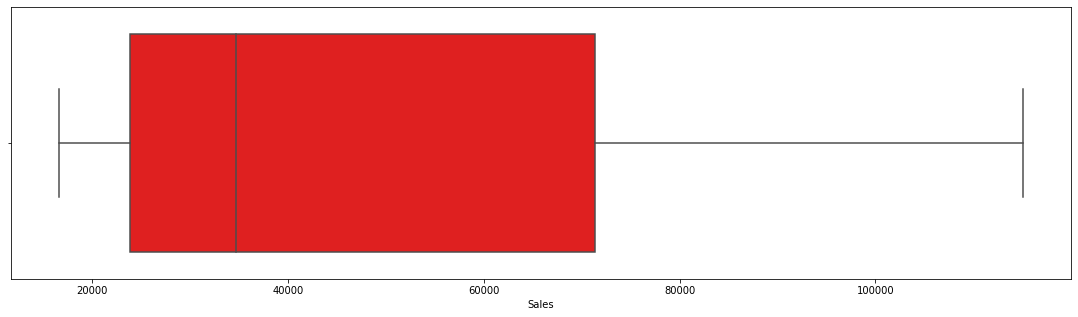

In [ ]:
plt.figure(figsize=(19,5)); 
sn.boxplot(dfnw['Sales'],color='red')
sales_range = dfnw['Sales'].max()-dfnw['Sales'].min()
print(sales_range)

##### Conclusion
Descartando los valores atipicos obtenemos que el rango de ventas es de 98,445 usd es decir la diferencia entre la compañia que vende mas y la que vende menos es de 98,445 usd

### 6. ¿Cuáles son las 5 empresas que más tiendas físicas tienen? ¿Cuáles de ellas están dentro de las 5 empresas que más ventas tuvieron?

<AxesSubplot:xlabel='Company', ylabel='Sales'>

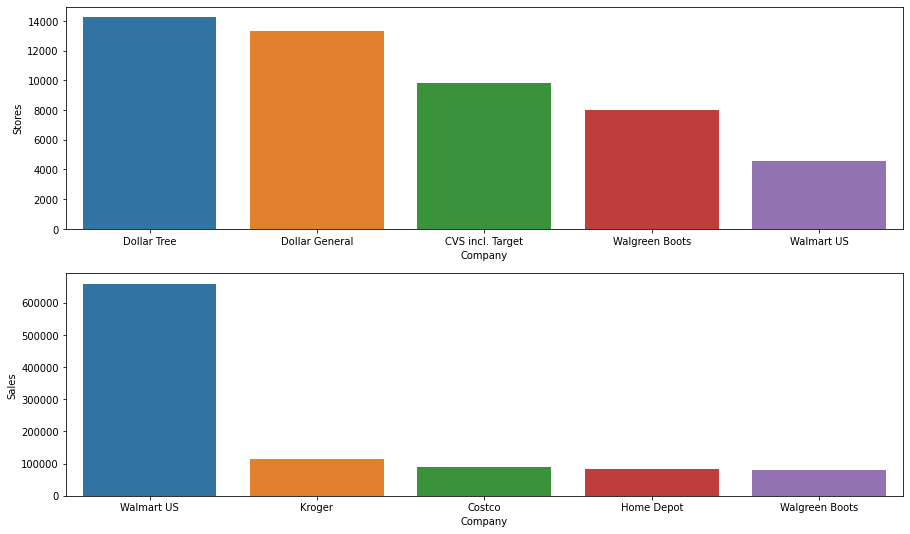

In [ ]:

dfstores = df.sort_values('Stores',ascending=0)
dfstores= dfstores[0:5]

dfsales = df.sort_values('Sales',ascending=0)
dfsales = dfsales[0:5]
fig, (ax,bx)= plt.subplots(2,1, figsize=(15,9))
sn.barplot(data=dfstores,x='Company',y='Stores',ax=ax)
sn.barplot(data=dfsales,x='Company',y='Sales',ax=bx)

##### Conslusión
Las 5 compañias con mas tiendas fisicas son Dollar tree, Dollar General, CVS incl. Target Company, Walgreen Boots y Walmart US de ellas las que estan entre las compañias con mas ventas son Walmart Us y Walgree Boots.

## II. Preguntas opcionales

### 7. ¿Qué categoría de compañía generó más ventas?

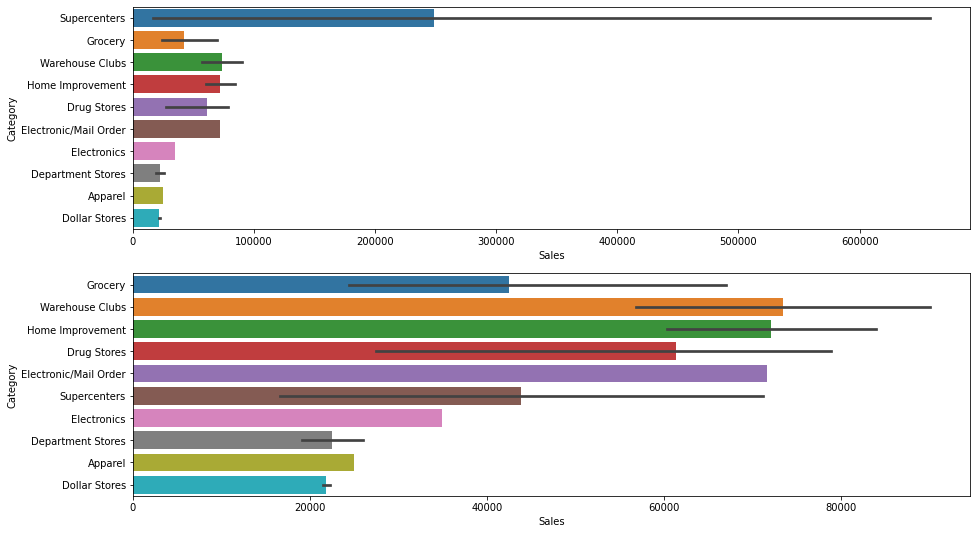

In [ ]:

fig, (ax,bx)= plt.subplots(2,1, figsize=(15,9));
sn.barplot(data=df,x='Sales',y='Category',ax=ax);
sn.barplot(data=dfnw,x='Sales',y='Category',ax=bx);

##### Conclusion
El Primer grafico incluye los datos de ventas de Walmart en la categoria Supercenters consideramos estos datos atipicos en el segundo grafico excluyendo los datos de Walmart podemos observar que la categoria con mas ventas es de Warehouse Club.
##### Aspectos a destacar
* Apple incl. Online no cuenta con datos en Categoria.

### 8. ¿Cuál es la compañía que en relación con su cantidad de tiendas físicas genera más ventas?

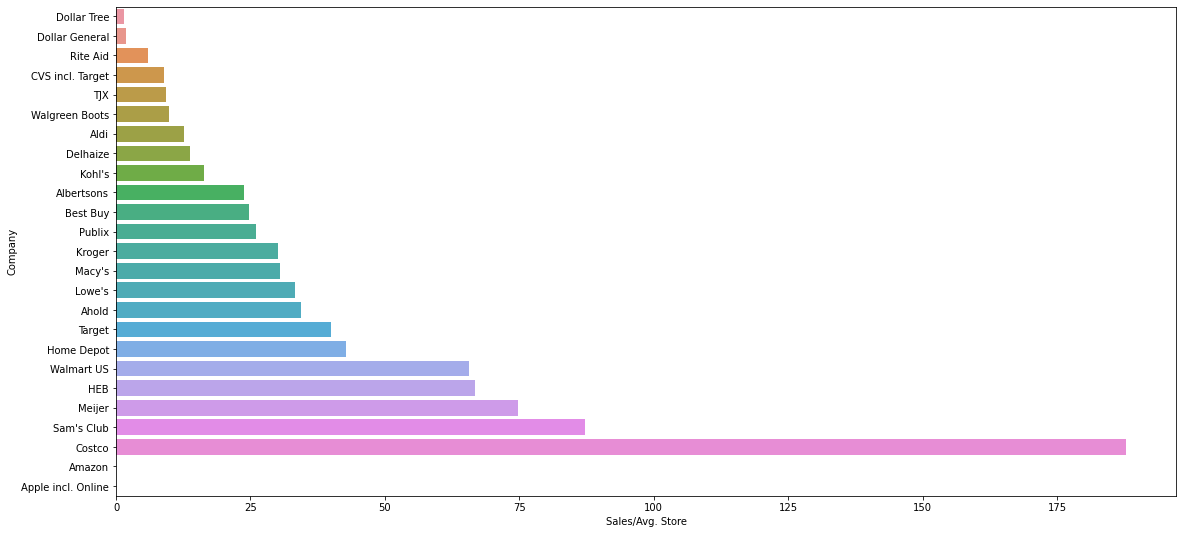

In [ ]:
plt.figure(figsize=(19,9)); 
dfsast = df.sort_values('Sales/Avg. Store')
sn.barplot(data= dfsast,x='Sales/Avg. Store',y='Company');


##### Conclusion
Costco es la compañia que en relacion son sus tiendas fisicas genera mas ventas .
##### Asectos a destacar 
* Apple incl. Online y Amazon al no contar con tiendas fisicas no son consideras en este analisis. 

### 9. ¿Cuáles compañías venden de forma exclusivamente online? ¿Sus ventas destacan sobre las que también tienen tiendas físicas?

Las compañias que venden exclusivamente de manera online son
6                 Amazon
11    Apple incl. Online
Name: Company, dtype: object


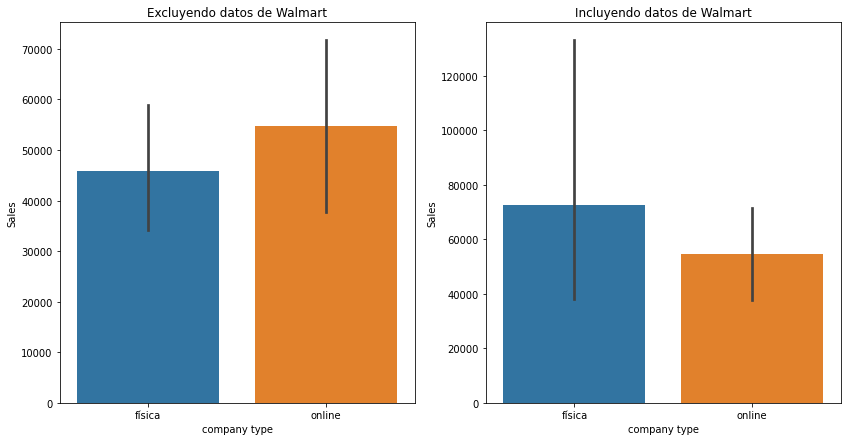

In [ ]:
fig, (ax,bx)= plt.subplots(1,2, figsize=(14,7))
dfnw['company type']=['online' if i else 'física' for i in dfnw.Stores.isna()]
df['company type']=['online' if i else 'física' for i in df.Stores.isna()]
sn.barplot(data= dfnw,x='company type',y='Sales',ax=ax);
sn.barplot(data= df,x='company type',y='Sales',ax=bx);
ax.set(title='Excluyendo datos de Walmart')
bx.set(title='Incluyendo datos de Walmart')
print('Las compañias que venden exclusivamente de manera online son')
print(df[df.Stores.isna()]['Company'])


##### Conclusion
Excluyendo los datos de venta de Walmart podemos observar en el primer grafico que las compañias con ventas exclusivamente online generan mas ventas que las fisicas 
##### Aspectos a destacar 
* Apple incl. Online y Amazon son las compañias que venden exclusicamente online.

## III. Tus propias preguntas

### 10. ¿Qué compañia tiene la mayor tasa de crecimiento?

0.04023000882013044

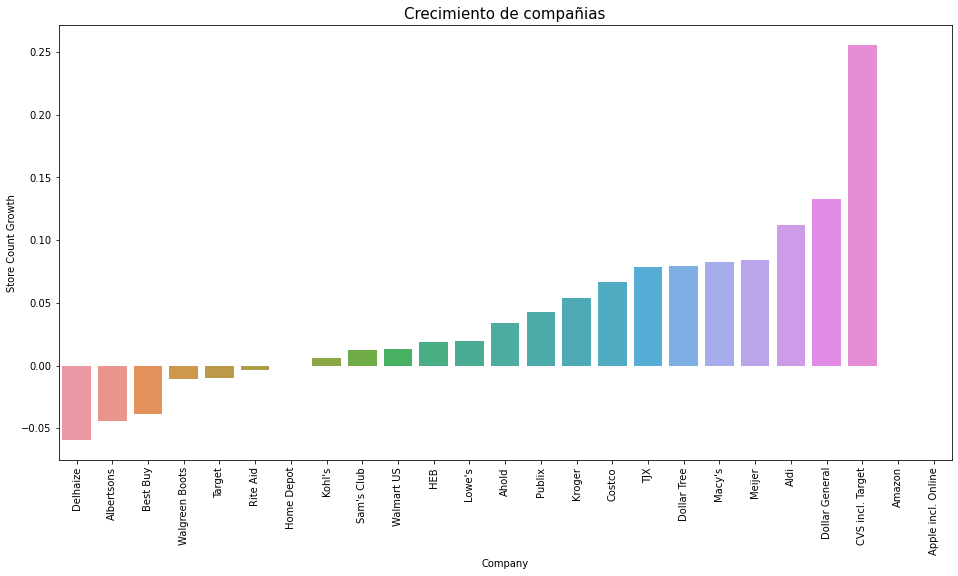

In [ ]:
plt.figure (figsize = (16,8))
plt.title('Crecimiento de compañias', fontsize = 15)
plt.xticks(rotation = 90)
sn.barplot (x= 'Company', y= 'Store Count Growth', data = df.sort_values('Store Count Growth'))
df['Store Count Growth'].mean()

##### Conclusion
CVS incl. target es la compañia con mayor crecimiento.


### 11. ¿Qué categoría de compañía tiene mas tiendas?

<AxesSubplot:xlabel='Category', ylabel='Stores'>

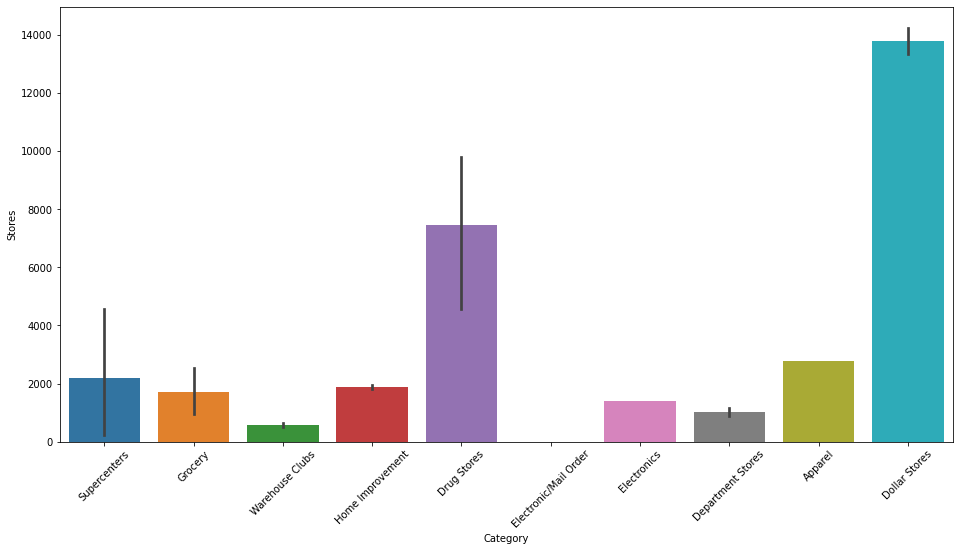

In [ ]:
plt.figure (figsize = (16,8))
plt.xticks(rotation = 45)
sn.barplot(data=df,y='Stores',x='Category')

##### Conclusion
Las tiendas de tipo Dollar Store son las que cuentan con un mayor numero de tiendas son tiendas donde se pueden encontrar distintos bienes a un precio accesible.

### 12. ¿Cual es la categoria con mas compañias y cual es la compañia dominante en la misma?

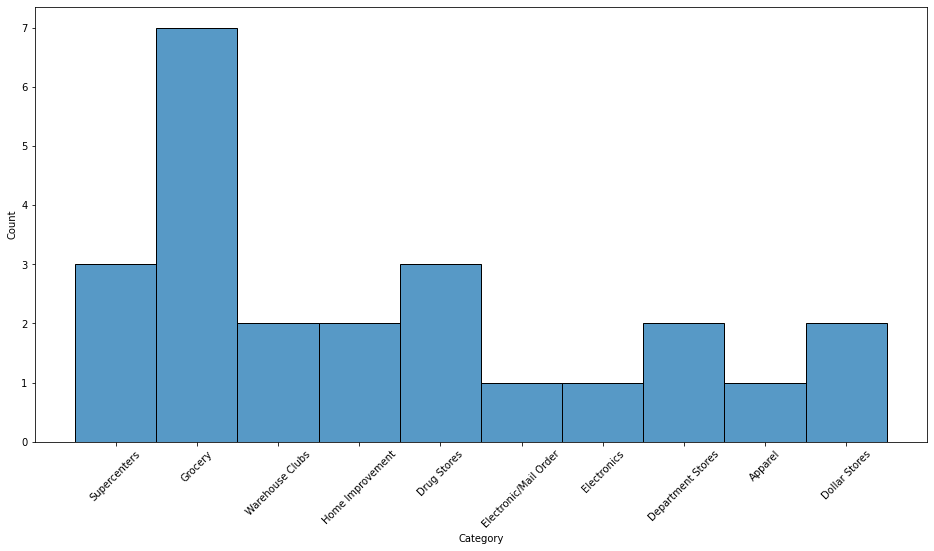

In [ ]:
plt.figure (figsize = (16,8))
plt.xticks(rotation = 45)
sn.histplot(data=df,x='Category')
dfg = df[df['Category'] == 'Grocery']


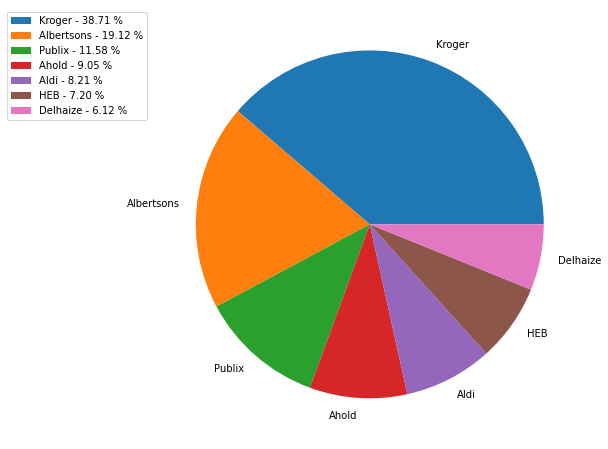

In [ ]:

plt.figure(figsize=(10,8))
w = 100* dfg['Sales']/dfg['Sales'].sum()
patches, _ =plt.pie(dfg['Sales'], labels=dfg['Company'],)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(dfg['Company'], w)]
plt.legend(patches, labels, loc='best', bbox_to_anchor=(0, 1))

plt.show()


##### Conclusion
Grosery es la categoria con mayor numero de compañias (7) la compañia dominante es Kroger con aproximadamente 39% del mercado

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=d36fbfe4-3f4f-4f8c-9aae-30fbef09f0ae' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>